In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
#import pytesseract
import numpy as np 
import math

In [2]:
def ocr_read(img):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(img)
    text = ''
    for i in range(0, len(result)):
        text += result[i][1] + ' '
##easyocr matrix kodu
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    print(f'Licence Plate: {text}')

In [3]:
imgag_path = 
image = cv2.imread("C:/Users/halil/Desktop/car16.jpg")

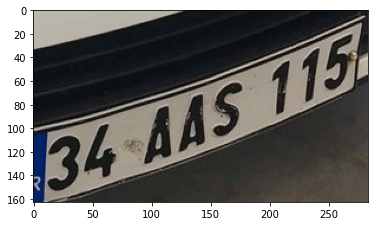

In [4]:
#defoult image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
#corner of the license plate that we wanna get perspective
#pt1 = left upper, pt2 = right upper, pt2 = left bottom, pt3 = right bottom 
pt1, pt2, pt3, pt4 = [3,108], [276,15],[10,161],[273,67]
xf =  abs(pt2[0] - pt1[0])
yf = abs(pt2[1] - pt1[1])
width = int(math.sqrt(xf**2 + yf**2))

x1f =  abs(pt3[1] - pt1[1])
y1f = abs(pt3[0] - pt1[0])
height = int(math.sqrt(x1f**2 + y1f**2))

pts1 = np.float32([pt1, pt2, pt3, pt4])
pts2 = np.float32([[0,0], [width,0], [0,height], [width, height]])


In [12]:
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgoutput = cv2.warpPerspective(image, matrix,(width,height))


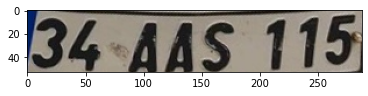

In [13]:
plt.imshow(cv2.cvtColor(imgoutput, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
gray1 = cv2.cvtColor(imgoutput, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

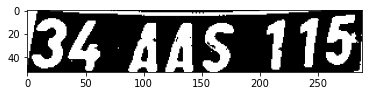

Licence Plate: 32 AaS 115 


In [15]:
thresh = cv2.threshold(gray1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
ocr_read(thresh)

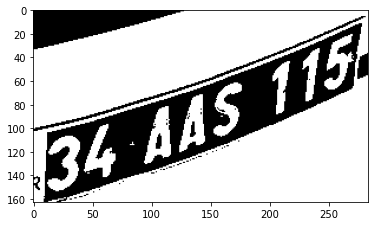

Licence Plate: 715 445 134 


In [16]:
thresh = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
ocr_read(thresh)